#  An Exploratory Analysis of Loan Data from Prosper.
## by Ikebude, Precious Chidiebere.

## Introduction
> Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Its subsidiary operates Prosper.com; a website where individuals can either invest in personal loans(peer-to-peer) or request to borrow money. Though founded in 2005 with pioneer status, it has facilitated over 21 billion dollars in loans to over 1.3M people. Prosper provides unsecure loans(Loans which do not require collateral)
The prosper loan dataset contains information on several variables representing about 113,937 loans collected from the company. It includes customers who have collected loans, customers who have cleared off pending loans as well as customers who have defaulted on their loan repayment schedules.
From the original dataset which contains 113937 rows and 81 columns, i analysed 14 variables.



## The 14 parameters analyzed include: 

**LoanOriginalAmount:** The origination amount of the loan.

**LenderYield:** The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

**LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.

**IncomeRange:** The income range of the borrower at the time the listing was created.

**LoanOriginationDate:** The date the loan was originated.

**CreditScoreRangeLower:** The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

**CreditScoreRangeUpper:** The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

**Term:** The length of the loan expressed in months.

**ProsperRating (numeric):** The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. Its rating relevance is arranged in ascending order, with 1 being high risk and 7 being the best score.

**ListingCategory:** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

**EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

**IncomeVerifiable:** The borrower indicated they have the required documentation to support their income.

**IsBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

**StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.
****
****












## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load dataset
loan = pd.read_csv('Prosperloandata.csv')

In [3]:
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
#lets get the shape of the dataset
loan.shape

(113937, 81)

### What is the structure of your dataset?

> The Prosper loan dataset has 113,937 sample entries in this mother dataset with 81 distinct attributes or characteristics. However, i analysed 14 out of the 81 attributes.

### What is/are the main feature(s) of interest in your dataset?

> My major feature of interest is the Lender Yield. This is because my aim is to identify features of an individual which an investor should consider important when choosing a prosper loan to fund. These features will also help the Prosper Company minimise the occurence of high risk loans which doesnt benefit investors and the Prosper company as a whole.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am interested in identifying charateristics which will help the Prosper company investors chose the best types of clients for its loan investments, as well as individuals with potential. It is important to invest in customers who do not default on their loan payments for maximum individual profits and an overall company growth.
However, as i do not have data on payments already made, i will focus on what is to be expected based on the presence or absense of certain characteristics such as an income, house ownership, employment, credit scores, prosper ratings etc.

# Data Accessment

In [5]:
#Ensure no columns are hidden 
pd.set_option('display.max_columns', None)

In [6]:
#Access a random sample of the dataset
loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
22219,B6B03594113974884646640,978050,2013-10-30 07:13:59.833000000,NaN,36,Current,NaN,0.21699,0.1800,0.1700,0.15867,0.0724,0.08627,4.0,C,5.0,1,FL,Professional,Employed,6.0,True,False,NaN,2013-10-30 07:14:01,680.0,699.0,1989-07-01 00:00:00,6.0,5.0,19.0,3,45.0,1.0,7.0,0.0,0.0,13.0,0.0,0.0,3679.0,0.30,8221.0,16.0,0.75,1.0,0.15,"$100,000+",True,9533.333333,DF3C36966188051059DF45B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,109546,25000,2013-11-04 00:00:00,Q4 2013,606636958848715722552DD,903.81,3615.2400,2182.33,1432.9100,-79.61,0.0,0.0,0.0,0.0,1.0,0,0,0.0,127
75919,735E3602024963441BA3D2F,1217016,2014-02-17 16:31:18.090000000,NaN,60,Current,NaN,0.16686,0.1435,0.1335,0.12640,0.0524,0.07400,5.0,B,9.0,1,MD,Sales - Commission,Employed,143.0,True,False,NaN,2014-02-17 16:31:20,680.0,699.0,1997-08-28 00:00:00,13.0,12.0,43.0,9,301.0,0.0,8.0,1.0,0.0,21.0,2.0,0.0,9547.0,0.58,3846.0,33.0,0.84,2.0,0.23,"$50,000-74,999",True,6166.666667,CE55370670230632546ABF6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,133271,15000,2014-02-25 00:00:00,Q1 2014,B7113707132816878E2FCC9,351.75,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,93
104725,108733817951149697CC6CF,104037,2007-02-27 09:25:11.300000000,D,36,Completed,2007-08-30 00:00:00,0.18726,0.1800,0.1700,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Accountant/CPA,Full-time,72.0,False,True,B0473364376920128370B13,2007-02-26 14:12:55.830000000,620.0,639.0,1995-04-21 00:00:00,12.0,5.0,24.0,5,38.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,6759.0,0.96,197.0,23.0,1.00,3.0,0.19,"$25,000-49,999",True,3867.500000,FEA23384143011854E01A0F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,84,8353,7500,2007-03-12 00:00:00,Q1 2007,608E33815984337398837DA,271.14,8065.3500,7500.00,565.3500,-31.41,0.0,0.0,0.0,0.0,1.0,0,0,0.0,77
59042,5EAC3419347145177960377,318917,2008-04-26 19:08:44.157000000,D,36,Completed,2010-03-30 00:00:00,0.17677,0.1550,0.1450,NaN,NaN,NaN,NaN,NaN,NaN,1,MI,Student - College Senior,Part-time,20.0,False,False,NaN,2008-04-07 21:02:12.517000000,600.0,619.0,2003-06-13 00:00:00,7.0,7.0,12.0,6,244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8517.0,0.97,220.0,7.0,1.00,0.0,0.40,"$1-24,999",True,1333.333333,E4FF342103548169980F2D5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,70,30601,5000,2008-05-06 00:00:00,Q2 2008,01DB341676175326692EAF9,174.55,6008.7100,5000.00,1008.7100,-65.08,0.0,0.0,0.0,0.0,1.0,1,0,0.0,134
17017,A7ED3584824849366CD6E6B,850419,2013-07-24 20:11:59.517000000,NaN,60,Current,NaN,0

In [7]:
#Check column information to identify attributes i want to work on
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
#Summary statistics of dataset
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

# Data Quality issues
> Datetime objects listed as strings (ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, LoanOriginationDate)

> Categorical data columns are listed as objects or floats(LoanStatus, ProsperRating (numeric), ProsperRating (Alpha), EmploymentStatus, IncomeRange)

> StatedMonthlyIncome column values are floats, making it more difficult for my use case.

> Missing values

# Data Tidiness issues
> Loan origination date is holding more than one data type (date and time) 

# Data Cleaning


In [9]:
loan_clean = loan.copy()

### Define
**Loan origination date column is holding more than one data type (date and time)**

Split Loan origination date column to get date and time 

### Code

In [10]:
#Split column by space dividing date and time
loan_clean[['loan_origination_date','loan_origination_time']] = loan_clean['LoanOriginationDate'].str.split(' ', expand=True)

### Test

In [11]:
#Check for the creation of new columns 
loan_clean.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_origination_date,loan_origination_time
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-09-12,00:00:00
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-03-03,00:00:00


### Define
**Inaccurate datatype**

Convert ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, loan_origination_date and LoanOriginationDate columns to datetime datatype


### Code

In [12]:
#Convert columns in date_columns list to Datetime using a function
import pandas as pd

date_columns = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', 'loan_origination_date']

# Convert columns in date_columns list to datetime using pd.to_datetime
for col in date_columns:
    loan_clean[col] = pd.to_datetime(loan_clean[col], errors='coerce')

### Test

In [13]:
#Confirm new data types
loan_clean['ListingCreationDate'].dtype
loan_clean['DateCreditPulled'].dtype
loan_clean['LoanOriginationDate'].dtype
loan_clean['loan_origination_date'].dtype

dtype('<M8[ns]')

In [14]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

### Define
**Categorical data columns are listed as objects or floats**

Convert LoanStatus, ProsperRating (numeric), ProsperRating (Alpha), EmploymentStatus and IncomeRange columns to categorical data.

 

In [15]:
#Convert rows in cat_columns list to categorical data using a function
cat_columns = ['LoanStatus','ProsperRating (numeric)', 'ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange']
for cols in cat_columns:
    loan_clean[cols] = loan_clean[cols].astype('category')

### Test

In [16]:
#Confirm new data type
print(loan_clean['LoanStatus'].dtype)
print(loan_clean['ProsperRating (Alpha)'].dtype)
print(loan_clean['IncomeRange'].dtype)

category
category
category


### Define

**StatedMonthlyIncome column values are floats**

Round up StatedMonthlyIncome column to the nearest whole number

In [17]:
#Check values in StatedMonthlyIncome column
loan_clean['StatedMonthlyIncome'].value_counts()

StatedMonthlyIncome
4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: count, Length: 13502, dtype: int64

In [18]:
#Round up StatedMonthlyIncome column
loan_clean['StatedMonthlyIncome'] = loan_clean['StatedMonthlyIncome'].round()

In [19]:
#Check values in StatedMonthlyIncome column
loan_clean['StatedMonthlyIncome'].value_counts()

StatedMonthlyIncome
4167.0     3530
5000.0     3391
3333.0     2925
3750.0     2430
5417.0     2376
           ... 
11392.0       1
17232.0       1
3109.0        1
796.0         1
18756.0       1
Name: count, Length: 7921, dtype: int64

### Define
**Missing values**

Columns with a significant number of missing values as they will not be used for this analysis

# Univariate Exploration

Using the "Question-Visualization-Observations" framework, i explore individual data attributes to generate answers to questions, using exploratory data visuals.


In [20]:
#Set colour palette and style
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (12, 8)})
colors = "#5B3"
set_color = sns.set_palette('Set3')
color='brown'

## Defining functions to be used for vizualizations.

In [21]:
#creating a function to plot histograms
def plot_histogram1(x, title, xlabel, ylabel, lower_limit, bns):
    '''This function plots single histograms'''
   
    #defining bins
    bins = np.arange(lower_limit, loan_clean[x].max()+bns, bns)
    
    #plot the histogram
    plt.hist( data = loan_clean, x = x,  bins = bins, color=colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=22)

In [22]:
#creating a function to plot histograms
def plot_histogram2(subplot, x, title, xlabel, ylabel, lower_limit, bns):
    '''This function plots multiple histograms'''
    
    #define subplots
    ax = plt.subplot(1,2,subplot)
    
    #defining bins
    bins = np.arange(lower_limit, loan_clean[x].max()+bns, bns)
    
    #plot the histogram
    plt.hist( data = loan_clean, x = x,  bins = bins, color=colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=22)

In [23]:
#creating a function to plot barcharts
def plot_bar1(x, title, xlabel, ylabel):
    '''This function plots single barcharts'''
   
    
    #plot the barchart
    sns.countplot(data=loan_clean, x= x, color =colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)

In [24]:
#creating a function to plot horizontal barcharts
def plot_barh1(y, title, xlabel, ylabel):
    '''This function plots single horizontal barcharts'''
   
    
    #plot the barchart
    sns.countplot(data=loan_clean, y= y, order= y.value_counts().index, color =colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)

In [25]:
#creating a function to plot barcharts
def plot_bar2(subplot ,x , title, xlabel, ylabel):
    '''This function plots multiple barcharts'''
    
    #defining subplot locations
    ax = plt.subplot(1 ,2 ,subplot)
    
    #plot the barchart
    sns.countplot(data=loan_clean, x= x, color =colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)
   

# What loan amounts are most requested for?

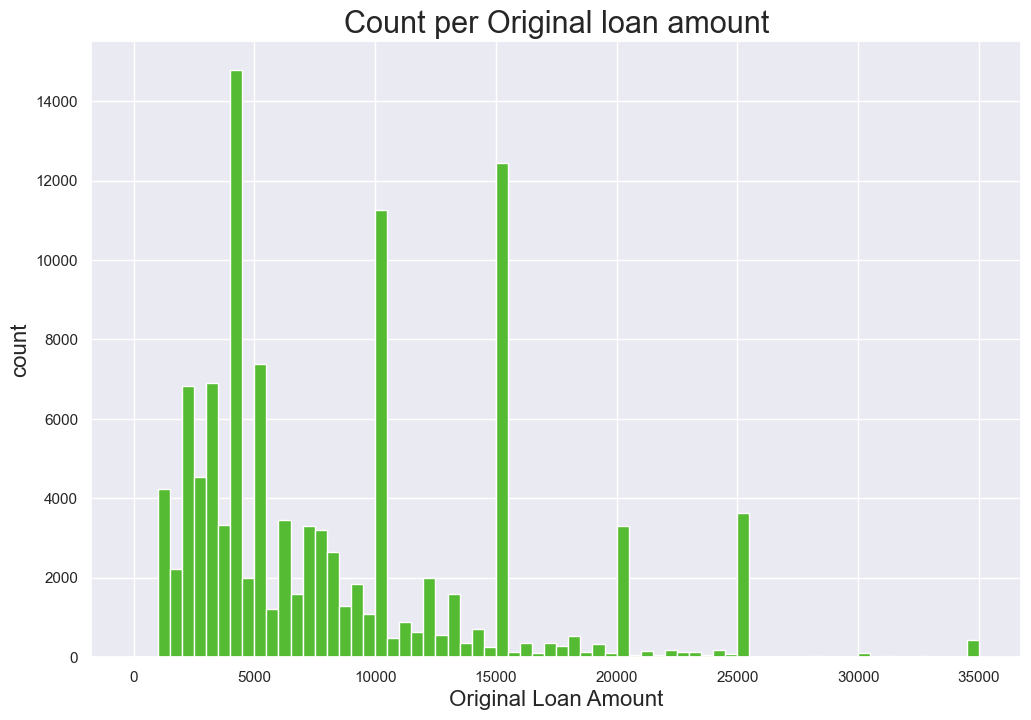

In [26]:
#Histogram showing the distribution of original loans collected
plot_histogram1(x='LoanOriginalAmount', title = 'Count per Original loan amount',xlabel= 'Original Loan Amount', ylabel='count', lower_limit=0, bns=500 )

4000 dollar loans were most requested for. Significant spikes were also observed at the 10000, 15000, 20000 and 25000 dollar loan marks. Lower amounts of monies were requested for compared to the higher values. This graph also shows a decline in the count of individuals who requested for loans above 25000 dollars.

# What percentage profit is to be expected as an investor?

In [27]:
#Summary statistics on the LenderYield column
loan_clean['LenderYield'].describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

In [28]:
loan_clean.query('LenderYield==-0.010000')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_origination_date,loan_origination_time
46874,3F5C3389508503122919326,143562,2007-05-28 06:40:54.803,HR,36,Defaulted,2010-10-05,0.01315,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,NY,Professional,Full-time,1.0,False,False,NaN,2007-05-13 08:46:25.487,520.0,539.0,2001-11-28,1.0,0.0,6.0,0,0.0,0.0,1.0,3.0,3894.0,17.0,0.0,0.0,0.0,0.00,0.0,6.0,0.00,0.0,0.01,"$50,000-74,999",True,5000.0,7BAE3392151479545AEE2DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,41.0,81,15659,1900,2007-06-05,Q2 2007,05833388721180887095666,52.78,1840.30,1832.74,7.56,-28.07,-24.24,82.62,-15.36,5.28,1.0,0,0,0.0,1,2007-06-05,00:00:00
65259,BB4E34191946516388AD563,310792,2008-04-15 05:35:10.670,HR,36,Completed,2011-04-18,0.01987,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,3,NC,Other,Full-time,13.0,False,False,NaN,2008-03-23 00:11:48.863,520.0,539.0,1996-08-09,2.0,3.0,7.0,1,24.0,1.0,6.0,2.0,320.0,5.0,1.0,0.0,800.0,1.60,0.0,5.0,0.33,0.0,0.13,"$25,000-49,999",True,3500.0,9E143419184185232F760F6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,29821,1000,2008-04-18,Q2 2008,A7F5341636869137603A17C,27.78,1000.00,1000.00,0.00,-13.62,0.00,0.00,0.00,0.00,1.0,0,1,1000.0,1,2008-04-18,00:00:00
76858,7ADE3385294777364BFEDD6,115163,2007-03-24 10:03:30.717,C,36,Completed,2010-03-27,0.00653,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,MI,Food Service Management,Full-time,152.0,False,True,DE3D33744748484575A88D1,2007-03-13 23:26:35.980,660.0,679.0,1998-09-03,2.0,3.0,5.0,3,21.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,178.0,0.00,2082.0,3.0,0.33,0.0,0.06,"$1-24,999",True,1833.0,27B533839209731593947BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,84,9000,3000,2007-03-27,Q1 2007,F0AC3377846854835F2B667,83.33,3000.00,3000.00,0.00,-46.39,0.00,0.00,0.00,0.00,1.0,0,1,50.0,2,2007-03-27,00:00:00
78920,CBC03418552010666B09260,319969,2008-04-28 11:48:10.400,C,36,Completed,2009-09-15,0.01987,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,1,NJ,Dentist,Full-time,3.0,True,True,C506336436884701891E267,2008-04-28 11:45:42.977,660.0,679.0,1996-06-22,18.0,18.0,38.0,11,1784.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,79709.0,0.60,51306.0,25.0,0.92,0.0,0.43,"$75,000-99,999",True,7917.0,DC383419893640145C50801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,30274,25000,2008-04-29,Q2 2008,33CB3364497014118C1E9ED,609.84,25104.16,25000.00,104.16,-272.85,-354.16,0.00,0.00,0.00,1.0,0,1,6800.0,2,2008-04-29,00:00:00
112717,C52F3426964405073574757,369381,NaT,A,36,Completed,2010-10-13,0.01315,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,7,

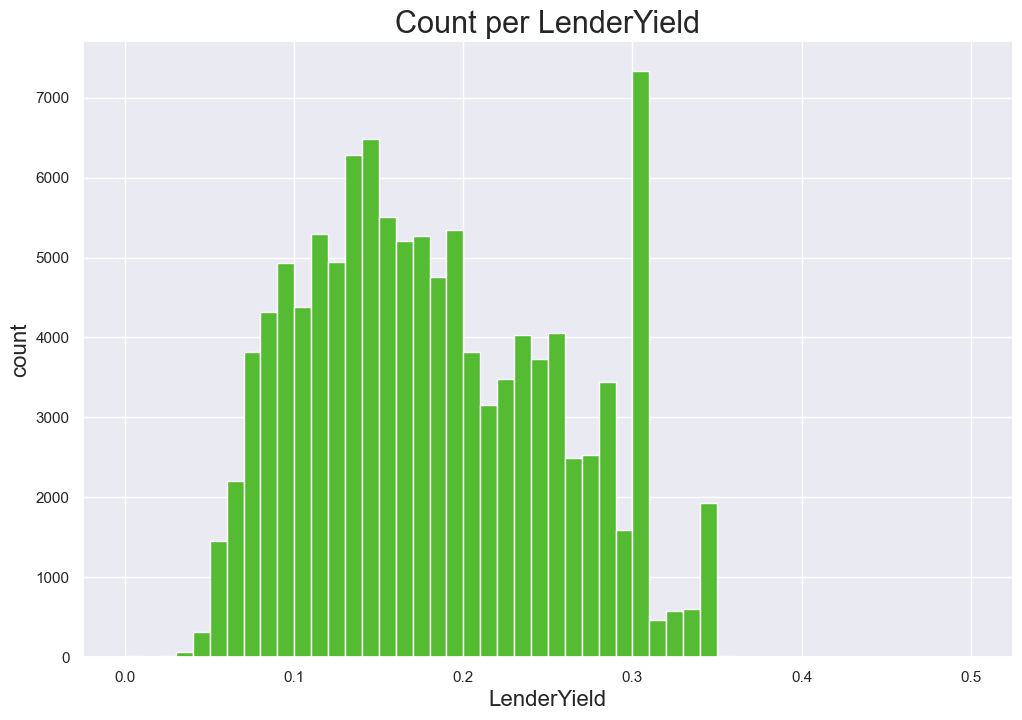

In [29]:
#Histogram showing lender yield percentage distribution
plot_histogram1(x='LenderYield', title = 'Count per LenderYield',xlabel= 'LenderYield', ylabel='count', lower_limit=0, bns=0.01 )

The highest possible yield on any loan is 0.492500% on the loaned amount. 0.3% has been most earned by investors, followed closely by 0.15%. On 5 loans, some investors earned -0.010%. 
This means that as an investor, if the right loans are not selected before investment, one could end up with losses.
This business definitely generates more gains than losses for its investors, making it a viable income source.

# What is the current state of prosper loans?

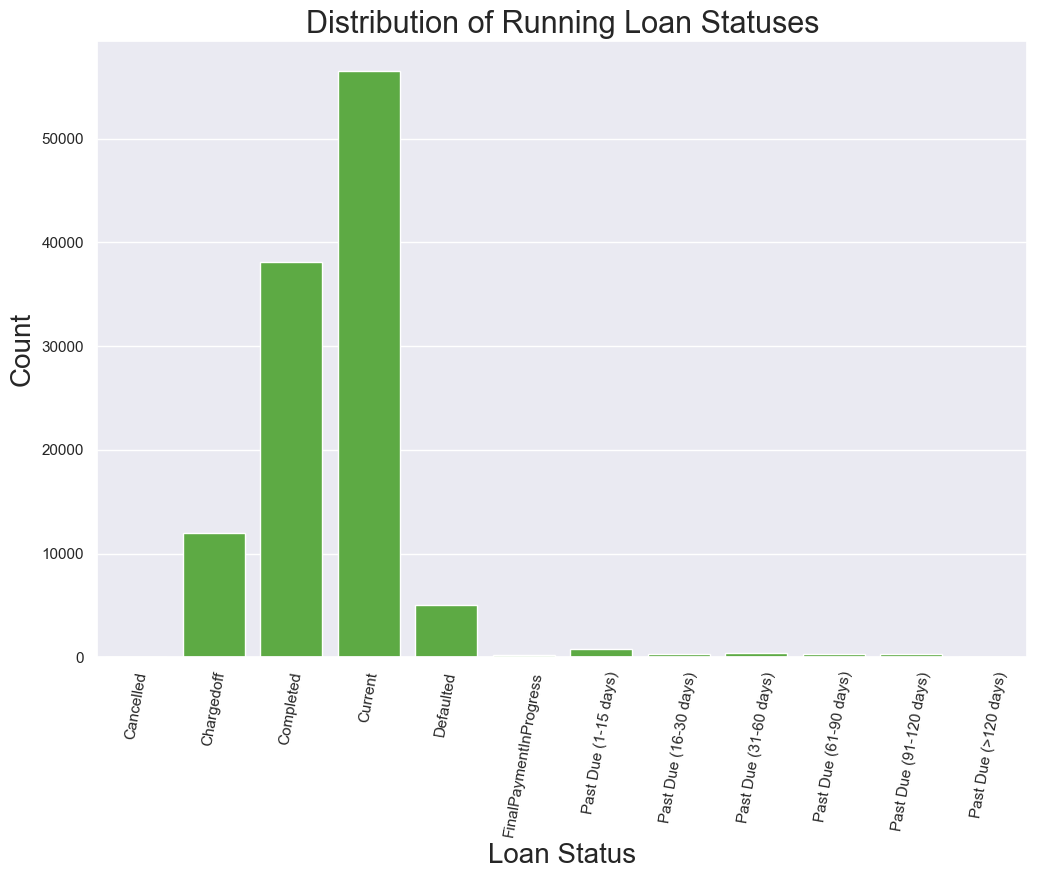

In [30]:
#Barchart showing the distribution of current prosper loans
plot_bar1(x = 'LoanStatus', title= "Distribution of Running Loan Statuses", xlabel= "Loan Status", ylabel= 'Count' )
plt.xticks(rotation = 80);

Most individuals using this service have loans that are currently running while a significant number of individuals have successfully collected and cleared off their loans. A minimal number of accounts are having difficulties paying back their premiums as agreed.

# What is the income range of individuals who have requested these loans?

In [31]:
#creating a dictionary of the categories in ordered form
arranged_income = { 'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}


#changing the data type to category
for col in arranged_income:
    cat_type = pd.api.types.CategoricalDtype(ordered = True, categories = arranged_income[col])
    loan_clean[col] = loan_clean[col].astype(cat_type)
    
loan_clean['IncomeRange'].replace('IncomeRange', inplace = True)

C:\Users\me\AppData\Local\Temp\ipykernel_6904\3357520226.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  loan_clean['IncomeRange'].replace('IncomeRange', inplace = True)


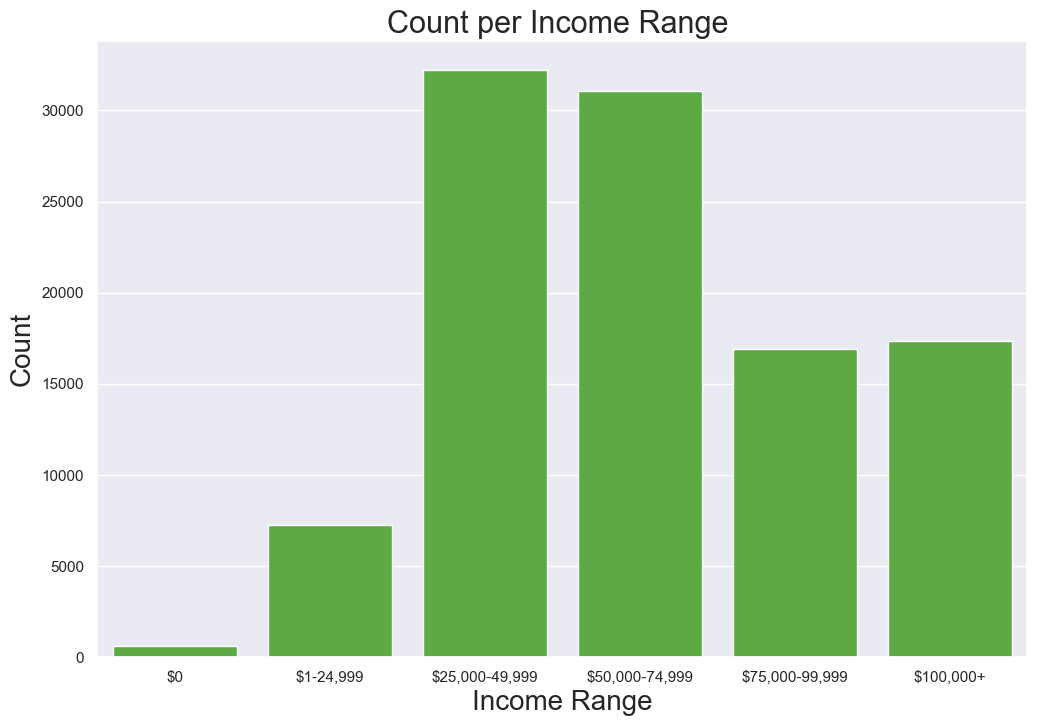

In [32]:
#Barchart showing income range count.
plot_bar1(x = 'IncomeRange', title= "Count per Income Range ", xlabel= "Income Range", ylabel= 'Count' )

Individuals who earn between 25,000 and 75,000 dollars have most access to prosper loans. Individuals who earn below 25,000 dollars or are unemployed do not receive as many loans as their other counterparts. This may be a significant feature for prosper loan collection.

# What year and month had the highest loan requests? 

In [33]:
#Create new columns for the year, month and weekday of loan origination
loan_clean['loan_created_year'] = loan_clean['loan_origination_date'].dt.year
loan_clean['loan_created_month'] = loan_clean['loan_origination_date'].dt.month_name()


loan_clean['loan_created_day'] = loan_clean['loan_origination_date'].dt.day_name()
loan_clean.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_origination_date,loan_origination_time,loan_created_year,loan_created_month,loan_created_day
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.0,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-09-12,00:00:00,2007,September,Wednesday
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,NaT,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.0,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-03-03,00:00:00,2014,March,Monday
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,True,2083.0,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007-01-17,00:00:00,2007,January,Wednesday


In [34]:
loan_clean['loan_created_month'].value_counts()

loan_created_month
January      11395
October      11043
December     10708
February      9728
November      9635
August        9592
September     9221
July          9154
June          8847
March         8555
May           8500
April         7559
Name: count, dtype: int64

In [35]:
#creating a dictionary of the categories in ordered form
arranged_col = { 'loan_created_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}


#changing the data type to category
for col in arranged_col:
    cat_type = pd.api.types.CategoricalDtype(ordered = True, categories = arranged_col[col])
    loan_clean[col] = loan_clean[col].astype(cat_type)
    
loan_clean['loan_created_month'].replace('loan_created_month', inplace = True)

C:\Users\me\AppData\Local\Temp\ipykernel_6904\3767082055.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  loan_clean['loan_created_month'].replace('loan_created_month', inplace = True)


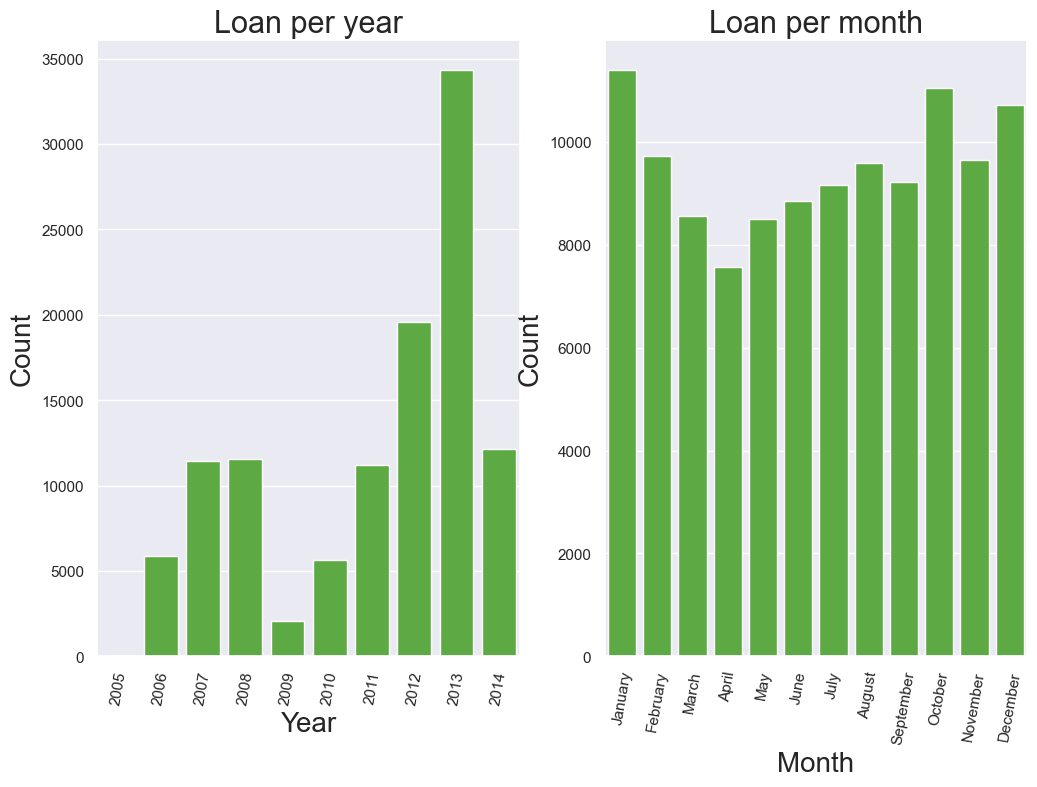

In [36]:
#Count plot showing the number of loans received per year and month
plot_bar2(subplot= 1,x= 'loan_created_year' , title= 'Loan per year', xlabel= 'Year', ylabel= 'Count')
plt.xticks(rotation = 80)
plot_bar2(subplot= 2,x= 'loan_created_month' , title= 'Loan per month', xlabel= 'Month', ylabel= 'Count')
plt.xticks(rotation = 80);

The highest number of loans were given out in 2013. However, a drop of over 50% was observed in 2014.
January was observed to be the month with highest loan collection over the years. The highest rated loan collection purpose was Debt consolidation. After the winter holidays and the numerous bills it brings, there will be a likely need for money to sustain an individual or family till the next paycheck.

# What variations or similiarities exist between the lower and upper credit score? 

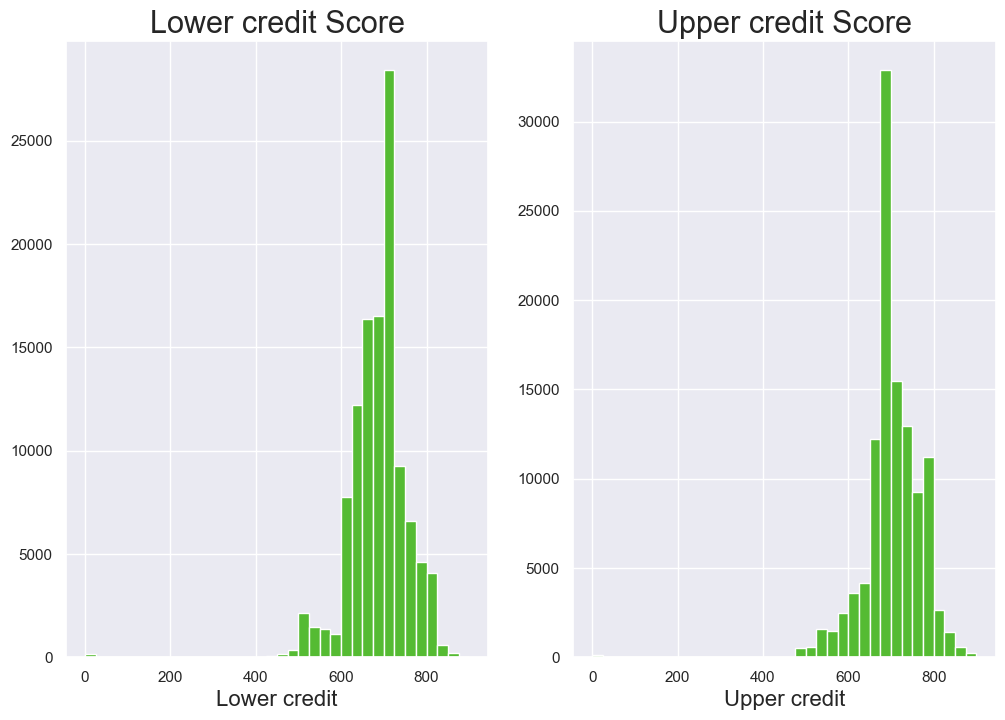

In [37]:
#Plot two subplots containing the lower credit score and upper credit score respectively
plot_histogram2(subplot= 1, x='CreditScoreRangeLower', title= 'Lower credit Score', xlabel= 'Lower credit' , ylabel= '', lower_limit= 0, bns=25)
plot_histogram2(subplot= 2, x='CreditScoreRangeUpper', title= 'Upper credit Score', xlabel= 'Upper credit' , ylabel= '', lower_limit= 0, bns=25)

Suprisingly, The lower credit scores peak at 700 - 725. This is slightly higher than the upper credit which peaks at 675-700. 

Both scores are almost within the same range

# What is the duration of loans taken on the platform?

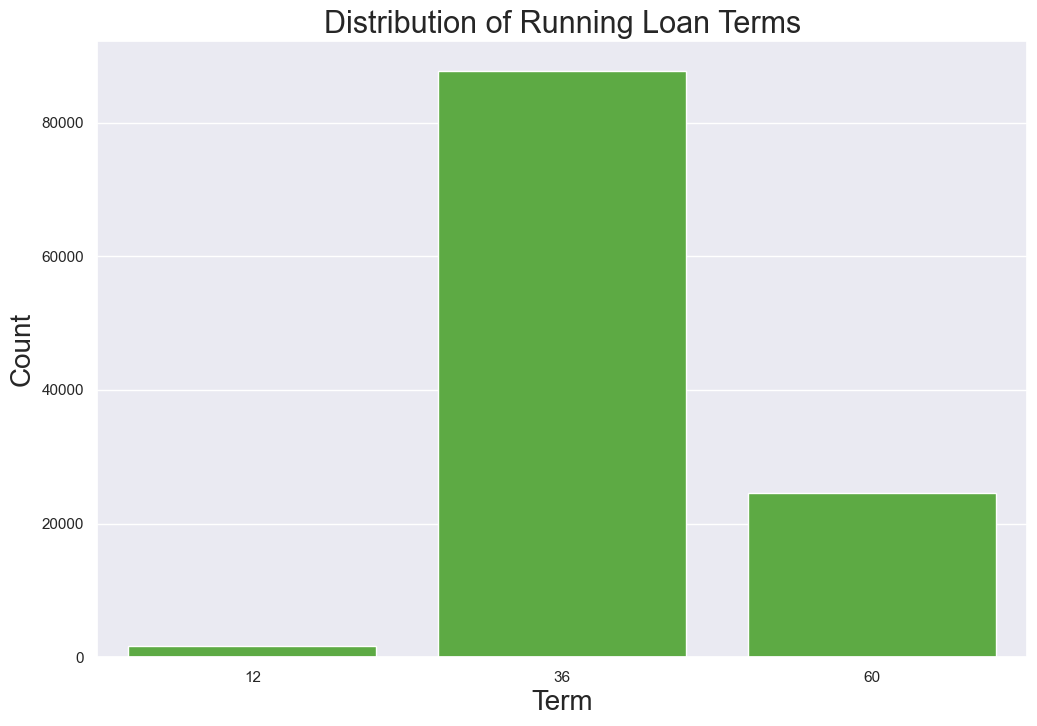

In [38]:
#Barchart showing loan terms
plot_bar1(x = 'Term', title= "Distribution of Running Loan Terms", xlabel= "Term", ylabel= 'Count')

Three loan terms are approved by Prosper company. 12 months, 36 months and 60 months. More than 50% of loans are to run for 36 months. The least favoured term is the 12 months, likely because of its short duration. Investors are likely to make more money on longer termed loans. The 36 month option is great for investors as it is most favoured by prosper clients.

# What are the highest and lowest prosper ratings by count?

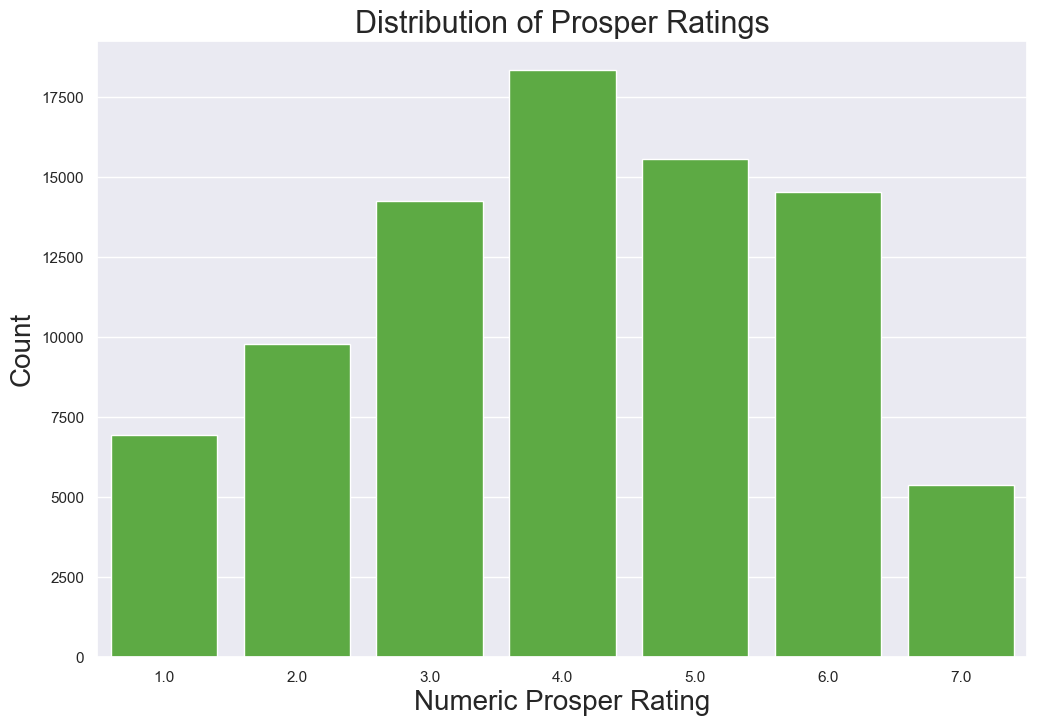

In [39]:
#Bar chart showing prosper rating count
plot_bar1(x = 'ProsperRating (numeric)', title= "Distribution of Prosper Ratings", xlabel= "Numeric Prosper Rating", ylabel= 'Count')

The prosper rating grows in idealty in ascending order. 1.0 being poorly rated and 7.0 being highly rated. Highly rated status was most difficult to achieve as fewer individuals fall in this category compared to others.
Most individuals performed averagely well.

# What purposes are most loans taken for?

In [40]:
#Replace the numeric values with their corresponding meanings
Listing_Categories = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 
                        8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
                        15:'Medical/Dental', 16: 'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

loan_clean['ListingCategory (numeric)'].replace(Listing_Categories, inplace = True)

#Rename the column, taking out the numeric tag
loan_clean.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

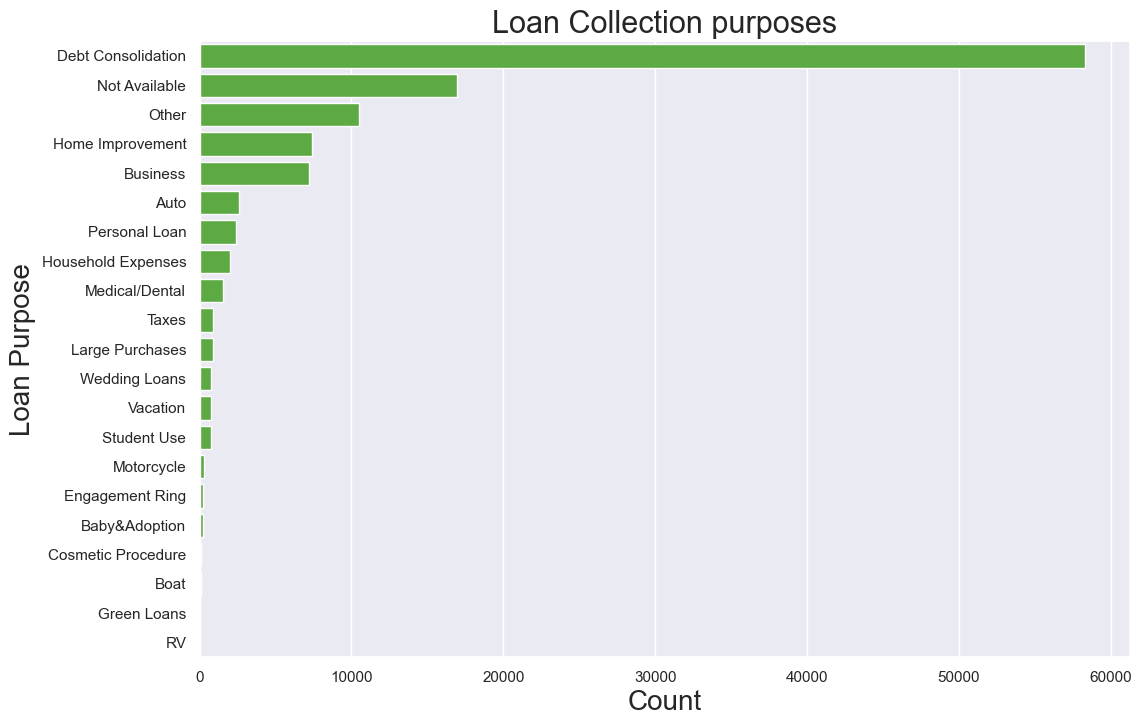

In [41]:
#Horizontal barchart showing Listing categories
plot_barh1(y = loan_clean['ListingCategory'], title= "Loan Collection purposes", xlabel= "Count", ylabel= "Loan Purpose")

Most individuals taking these loans are employed. Loan recovery will be easier amongst the employed compared to the not employed.

# What proportion of clients have a verifiable income?

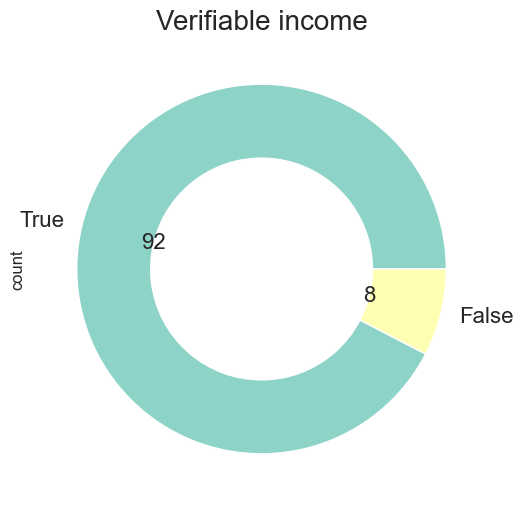

In [42]:
#create donut chart
plt.figure(figsize=[8,6])
loan_clean['IncomeVerifiable'].value_counts().plot(kind="pie",  autopct='%0.0f', colors = set_color, textprops={'fontsize': 16}, wedgeprops = {'width' : 0.4})

plt.title('Verifiable income', fontsize=20)
plt.show()


About 92 percent of individuals given a prosper loan have a verifiable source of income

# What proportion of borrowers own homes?

In [43]:
loan_clean['IsBorrowerHomeowner'].value_counts()

IsBorrowerHomeowner
True     57478
False    56459
Name: count, dtype: int64

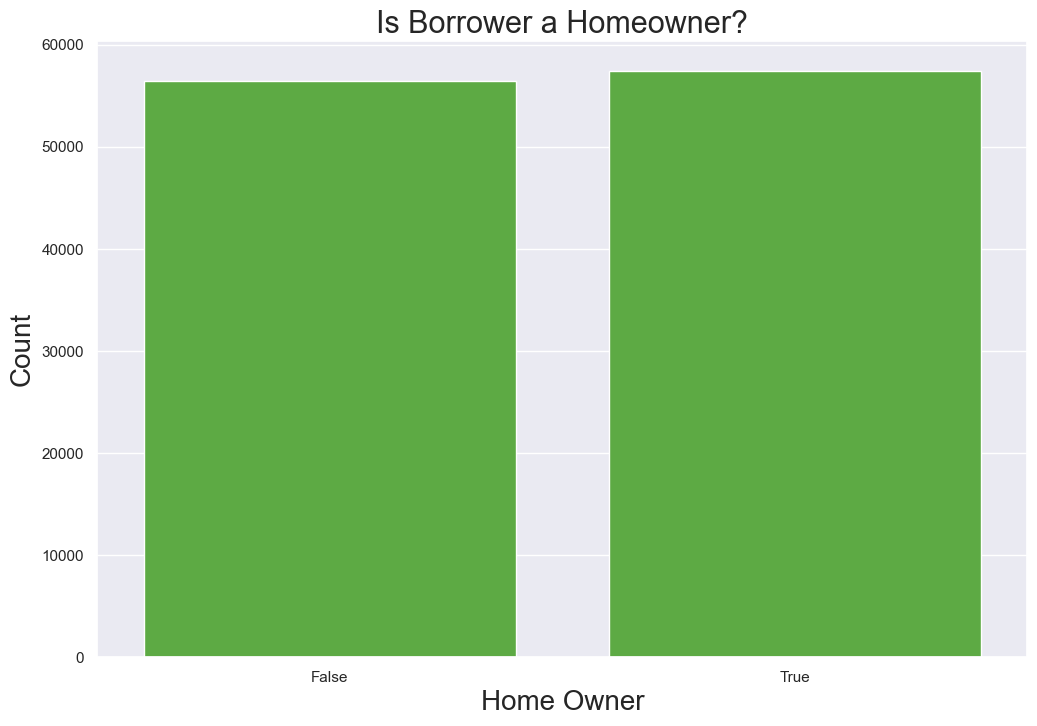

In [45]:
#Bar Chart showing counts of home owers and non owners.
plot_bar1( x = "IsBorrowerHomeowner", title = 'Is Borrower a Homeowner?', xlabel = 'Home Owner', ylabel = 'Count')

About 57478 Individuals own homes while about 56459 Individuals do not own homes. I would like to discover if this is an important metric to be considered berfore approving or Investing in a loan.
